In [65]:
# Import Packages
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Read NYC 2019 AirBnb Data
df = pd.read_csv("/Users/christopherhalim888/OneDrive/Personal Project/NYC AirBnb/AB_NYC_2019.csv")

In [66]:
# Take a look at the data
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/18,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/19,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/19,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/18,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [67]:
# Check for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
name - 0%
host_id - 0%
host_name - 0%
neighbourhood_group - 0%
neighbourhood - 0%
latitude - 0%
longitude - 0%
room_type - 0%
price - 0%
minimum_nights - 0%
number_of_reviews - 0%
last_review - 21%
reviews_per_month - 21%
calculated_host_listings_count - 0%
availability_365 - 0%


In [68]:
# Check data type
print(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


<AxesSubplot:>

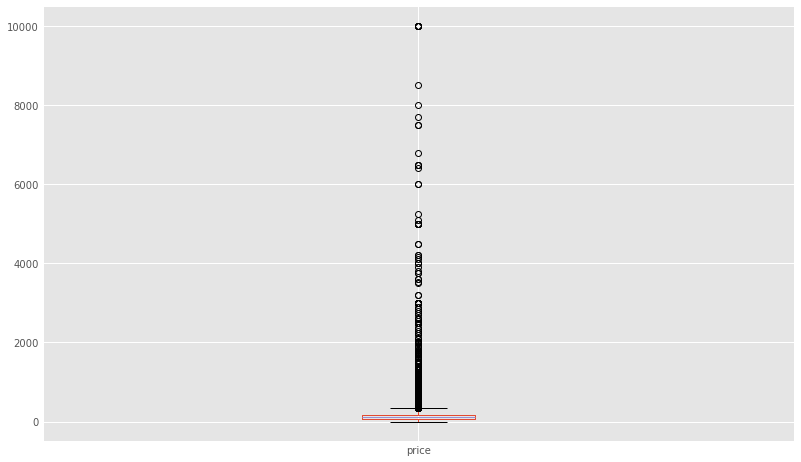

In [69]:
# Check for Outliers: Price
df.boxplot(column=['price'])

<AxesSubplot:>

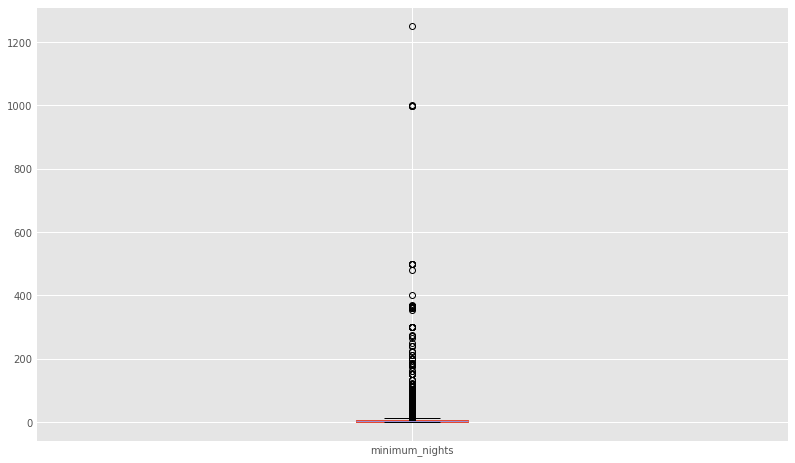

In [76]:
# Check for Outliers: Minimum Nights
df.boxplot(column=['minimum_nights'])

<AxesSubplot:>

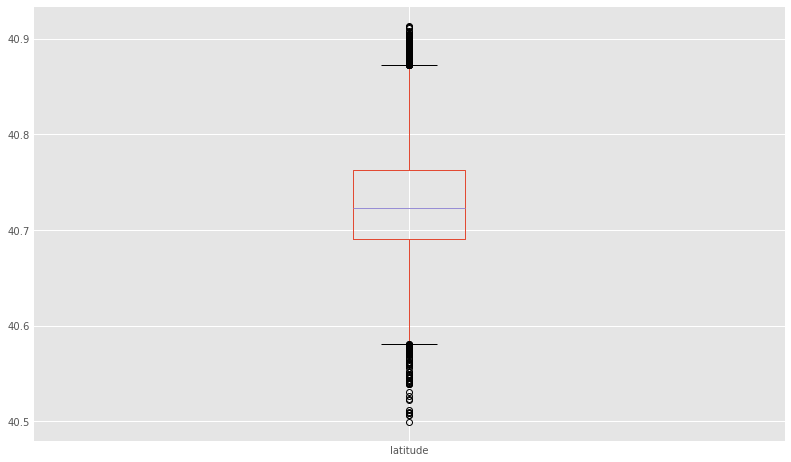

In [77]:
# Check for Outliers: Latitude
df.boxplot(column=['latitude'])

<AxesSubplot:>

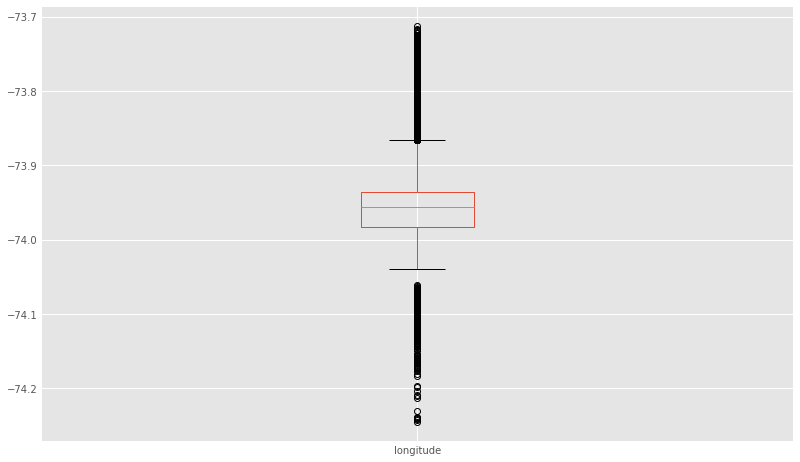

In [78]:
# Check for Outliers: Longitude
df.boxplot(column=['longitude'])

In [79]:
# Let Go of Any Duplicate Data
df.drop_duplicates()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/18,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/19,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/19,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/18,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [80]:
# Order Data by Price
df.sort_values(by=['price'], inplace=False, ascending=False)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2/13/16,0.04,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,7/27/17,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83
40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,NaN,1,365
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,1/1/16,0.14,1,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,1/2/18,0.15,1,73
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,6/23/19,4.35,6,222
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,6/24/19,2.56,4,127
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,6/22/19,0.11,6,333


<AxesSubplot:xlabel='number_of_reviews', ylabel='price'>

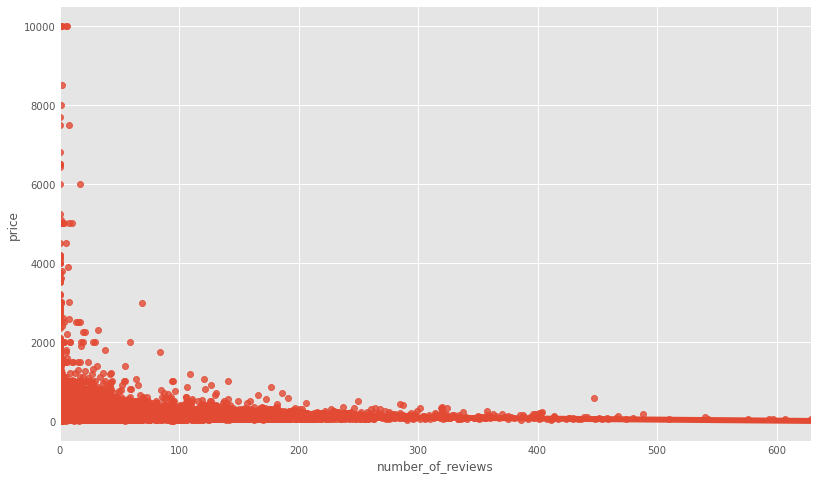

In [81]:
# Check for Price and Number of Review
sns.regplot(x="number_of_reviews", y="price", data=df)

# Cheaper Airbnbs tend to have more reviews, people stay more. 

In [82]:
# Correlation between all numeric columns

df.corr(method ='pearson')

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


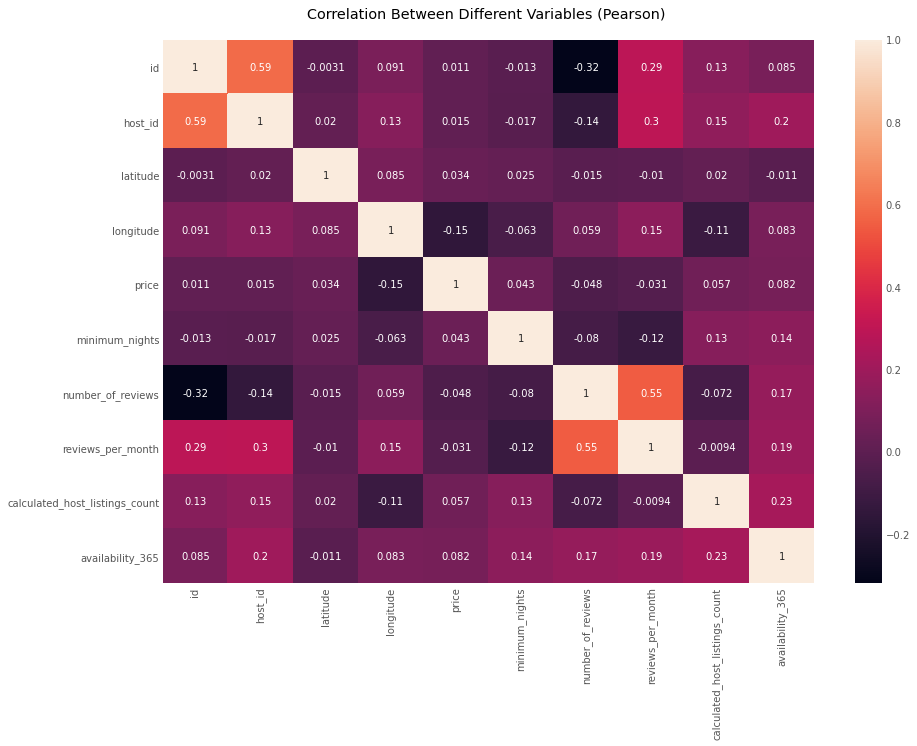

In [83]:
corr = df.corr(method='pearson')
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables (Pearson) \n")
sns.heatmap(corr, annot=True)
plt.show()

In [84]:
df.corr(method ='kendall')

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.420839,0.003315,0.048173,-0.015154,-0.041880,-0.219792,0.243300,0.103732,0.119636
host_id,0.420839,1.000000,0.033103,0.074113,-0.049696,-0.093476,-0.088893,0.177456,0.112193,0.120790
latitude,0.003315,0.033103,1.000000,0.036699,0.090532,0.016805,-0.030714,-0.015486,0.001361,-0.005180
longitude,0.048173,0.074113,0.036699,1.000000,-0.302361,-0.086497,0.055079,0.079830,0.050607,0.048909
price,-0.015154,-0.049696,0.090532,-0.302361,1.000000,0.074233,-0.037926,-0.012414,-0.085327,0.061053
minimum_nights,-0.041880,-0.093476,0.016805,-0.086497,0.074233,1.000000,-0.132916,-0.216179,0.047818,0.056693
number_of_reviews,-0.219792,-0.088893,-0.030714,0.055079,-0.037926,-0.132916,1.000000,0.533753,0.044516,0.174963
reviews_per_month,0.243300,0.177456,-0.015486,0.079830,-0.012414,-0.216179,0.533753,1.000000,0.111728,0.272799
calculated_host_listings_count,0.103732,0.112193,0.001361,0.050607,-0.085327,0.047818,0.044516,0.111728,1.000000,0.330602
availability_365,0.119636,0.120790,-0.005180,0.048909,0.061053,0.056693,0.174963,0.272799,0.330602,1.000000


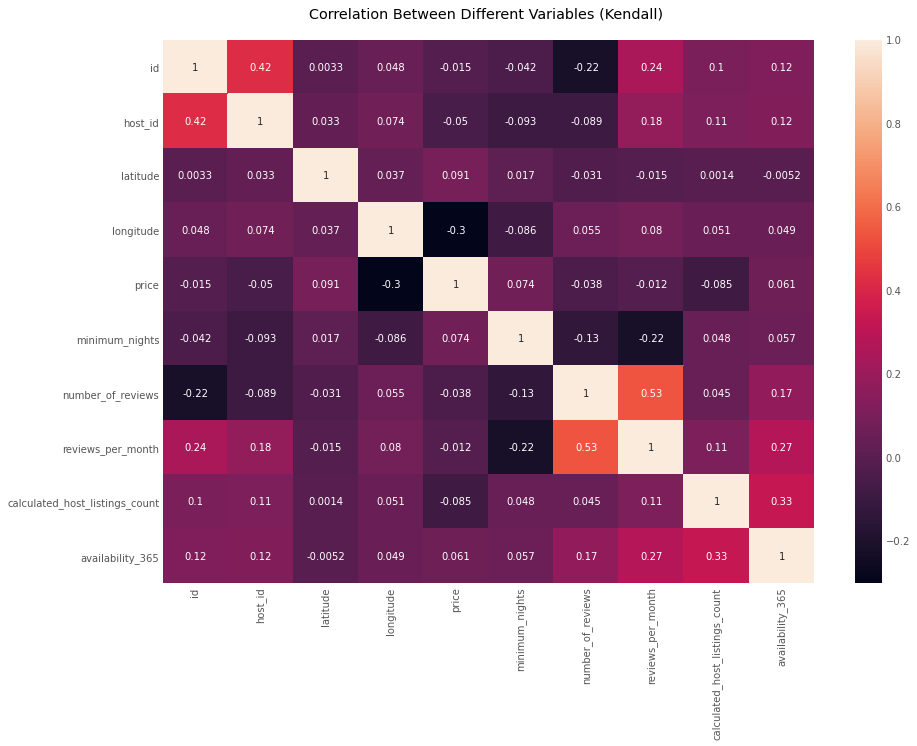

In [85]:
corr = df.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables (Kendall) \n")
sns.heatmap(corr, annot=True)
plt.show()

In [86]:
df.corr(method ='spearman')

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.558918,0.004996,0.070697,-0.020739,-0.057798,-0.307933,0.360443,0.135250,0.165714
host_id,0.558918,1.000000,0.049621,0.108965,-0.071772,-0.130251,-0.128008,0.267899,0.147273,0.173292
latitude,0.004996,0.049621,1.000000,0.035107,0.136172,0.022289,-0.044354,-0.023149,0.003526,-0.006962
longitude,0.070697,0.108965,0.035107,1.000000,-0.438035,-0.118921,0.079847,0.119089,0.063523,0.068899
price,-0.020739,-0.071772,0.136172,-0.438035,1.000000,0.101289,-0.055009,-0.018527,-0.106083,0.086088
minimum_nights,-0.057798,-0.130251,0.022289,-0.118921,0.101289,1.000000,-0.174905,-0.288797,0.064117,0.075981
number_of_reviews,-0.307933,-0.128008,-0.044354,0.079847,-0.055009,-0.174905,1.000000,0.706208,0.056054,0.236664
reviews_per_month,0.360443,0.267899,-0.023149,0.119089,-0.018527,-0.288797,0.706208,1.000000,0.146484,0.392126
calculated_host_listings_count,0.135250,0.147273,0.003526,0.063523,-0.106083,0.064117,0.056054,0.146484,1.000000,0.406606
availability_365,0.165714,0.173292,-0.006962,0.068899,0.086088,0.075981,0.236664,0.392126,0.406606,1.000000


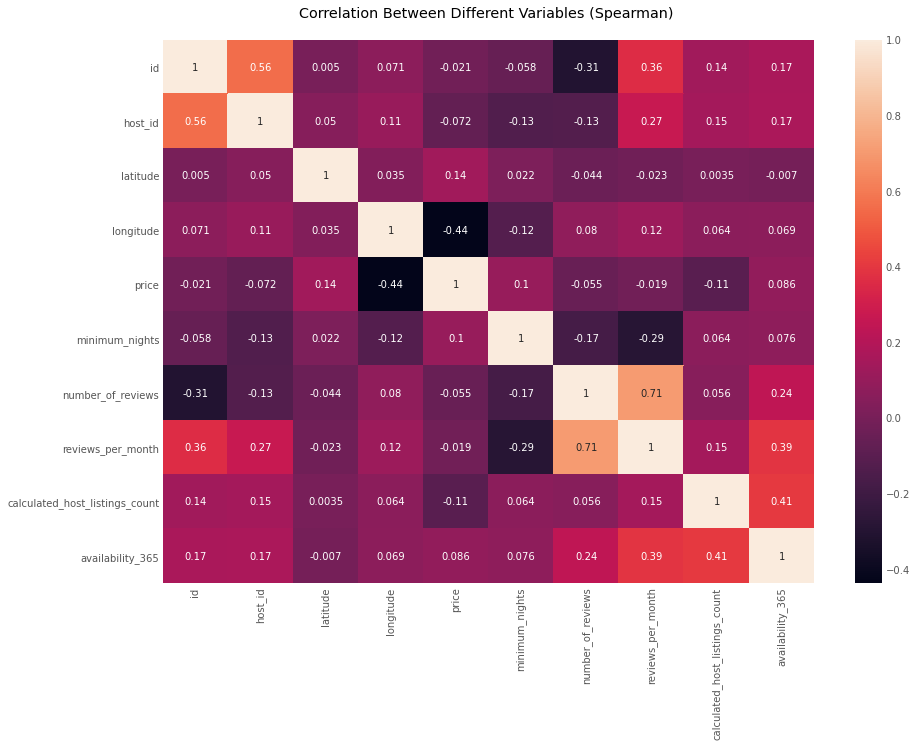

In [87]:
corr = df.corr(method='spearman')
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables (Spearman) \n")
sns.heatmap(corr, annot=True)
plt.show()

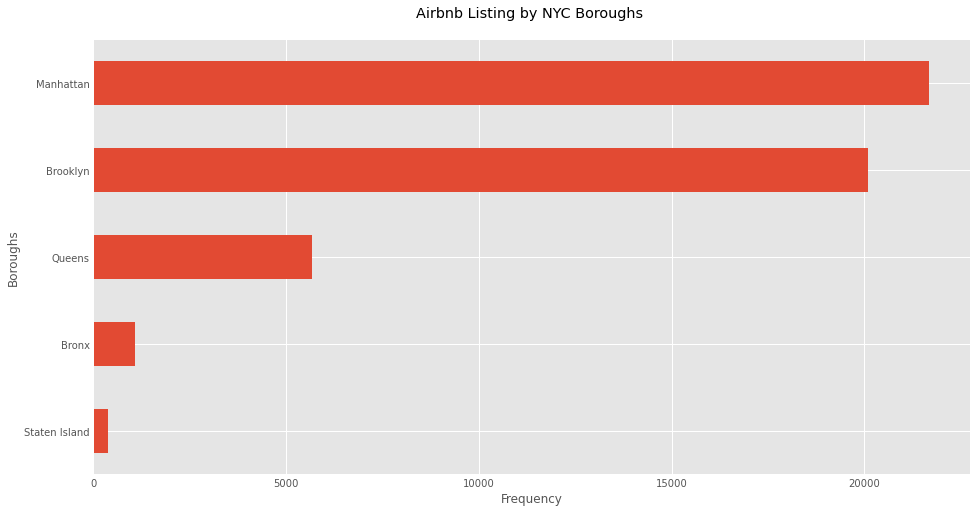

In [88]:
# Number of Listings by Boroughs: Bar Chart

list_boroughs = df['neighbourhood_group'].value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(14,8),
                                    title="Airbnb Listing by NYC Boroughs \n")
list_boroughs.set_xlabel("Frequency")
list_boroughs.set_ylabel("Boroughs")
plt.show()

In [89]:
df['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Rossville                1
Woodrow                  1
Willowbrook              1
New Dorp                 1
Name: neighbourhood, Length: 221, dtype: int64

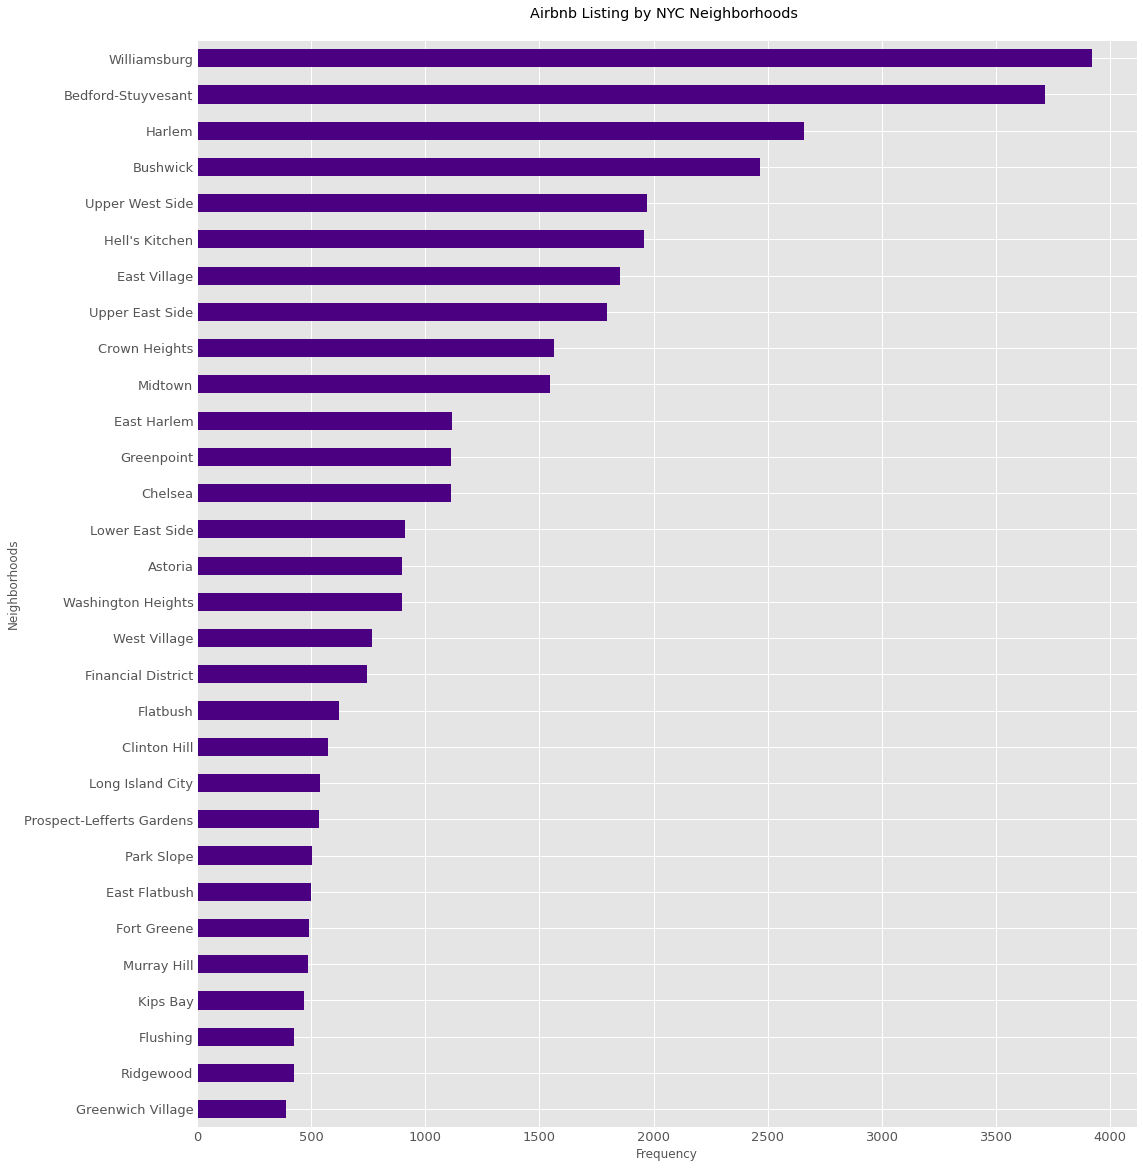

In [90]:
# Top 30 Airbnb Neighbourhoods

neigh_count = df['neighbourhood'].value_counts().sort_values(ascending=True)[191:221].plot(kind='barh',figsize=(15,20), color="indigo", fontsize=13,title="Airbnb Listing by NYC Neighborhoods \n")
neigh_count.set_xlabel("Frequency")
neigh_count.set_ylabel("Neighborhoods")
plt.show()

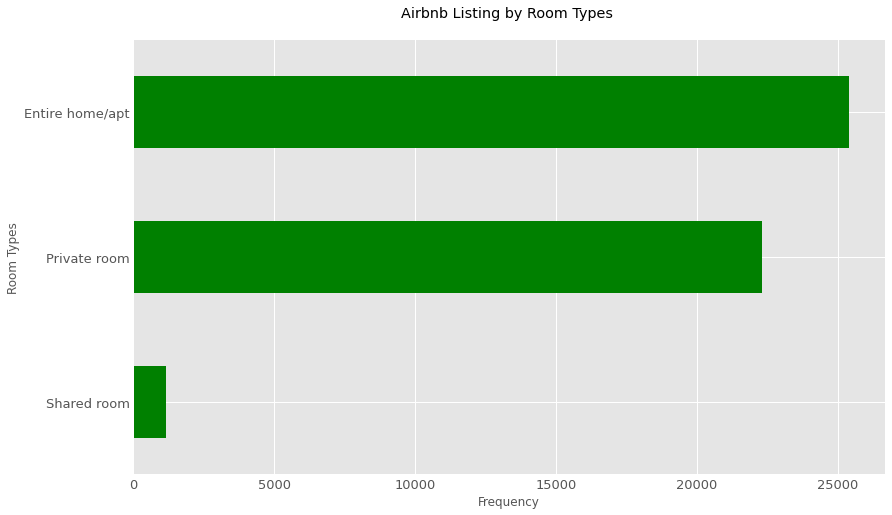

In [91]:
 # Room Type of the Airbnbs

roomtype = df['room_type'].value_counts().sort_values(ascending=True).plot(kind='barh', color="green", fontsize=13,title="Airbnb Listing by Room Types \n")
roomtype.set_xlabel("Frequency")
roomtype.set_ylabel("Room Types")
plt.show()

In [92]:
pip install basemap-1.0.8-cp34-none-win_amd64.whl


ERROR: basemap-1.0.8-cp34-none-win_amd64.whl is not a supported wheel on this platform.
Note: you may need to restart the kernel to use updated packages.


In [93]:
import geopandas as gpd
import contextily as ctx

# Mapping Airbnb Prices
df_geo = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.longitude, df.latitude))

df_geo


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/18,0.21,6,365,POINT (-73.97237 40.64749)
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/19,0.38,2,355,POINT (-73.98377 40.75362)
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,POINT (-73.94190 40.80902)
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/19,4.64,1,194,POINT (-73.95976 40.68514)
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/18,0.10,1,0,POINT (-73.94399 40.79851)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,POINT (-73.94995 40.67853)
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,POINT (-73.93317 40.70184)
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,POINT (-73.94867 40.81475)
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,POINT (-73.99112 40.75751)


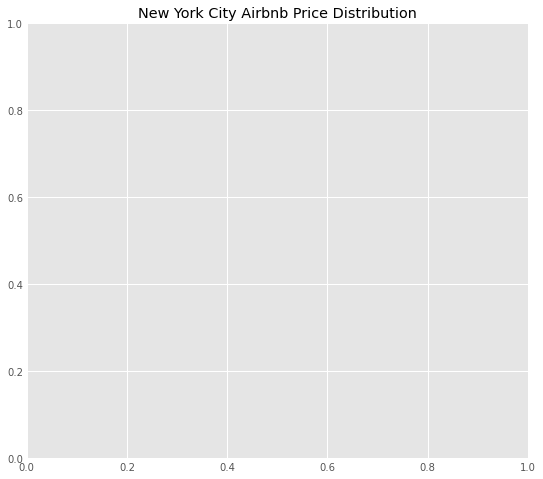

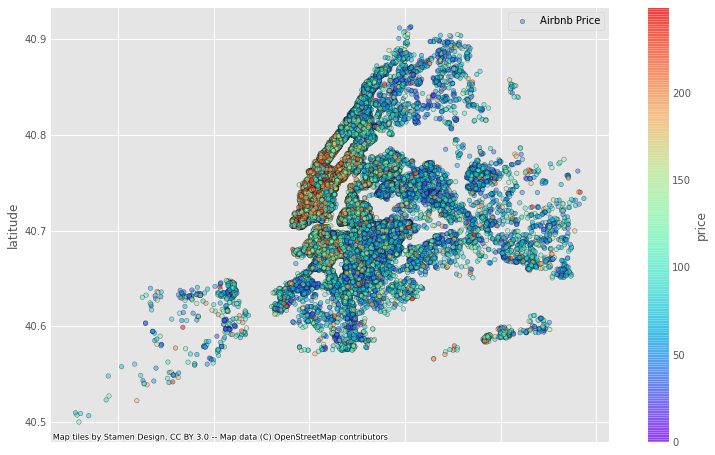

In [94]:
# Put the Graph on Top of the Background
plt.figure(figsize=(8,8))
plt.title("New York City Airbnb Price Distribution")
ax = df[df.price<250].plot(kind='scatter', x='longitude',y='latitude',label='Airbnb Price',c='price',cmap=plt.get_cmap('rainbow'),colorbar=True,alpha=0.5,edgecolor='k')
ax.legend()
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLabels, zoom=10)
plt.ioff()
plt.show()

In [104]:
df_manhattan = df[df.neighbourhood_group == 'Manhattan']
map = px.scatter(df_manhattan,x="latitude", y="longitude", color="room_type", template="seaborn", title="Room Types Classification in Manhattan",width=600,height=400)
map.show()

In [105]:
df_manhattan = df[df.neighbourhood_group == 'Queens']
map = px.scatter(df_manhattan,x="latitude", y="longitude", color="room_type", template="seaborn", title="Room Types Classification in Queens",width=600,height=400)
map.show()

In [107]:
df_manhattan = df[df.neighbourhood_group == 'Bronx']
map = px.scatter(df_manhattan,x="latitude", y="longitude", color="room_type", template="seaborn", title="Room Types Classification in Bronx",width=600,height=400)
map.show()

In [112]:
df_manhattan = df[df.neighbourhood_group == 'Brooklyn']
map = px.scatter(df_manhattan,x="latitude", y="longitude", color="room_type", template="seaborn", title="Room Types Classification in Brooklyn",width=600,height=400)
map.show()

In [113]:
df_manhattan = df[df.neighbourhood_group == 'Staten Island']
map = px.scatter(df_manhattan,x="latitude", y="longitude", color="room_type", template="seaborn", title="Room Types Classification in Staten Island",width=600,height=400)
map.show()

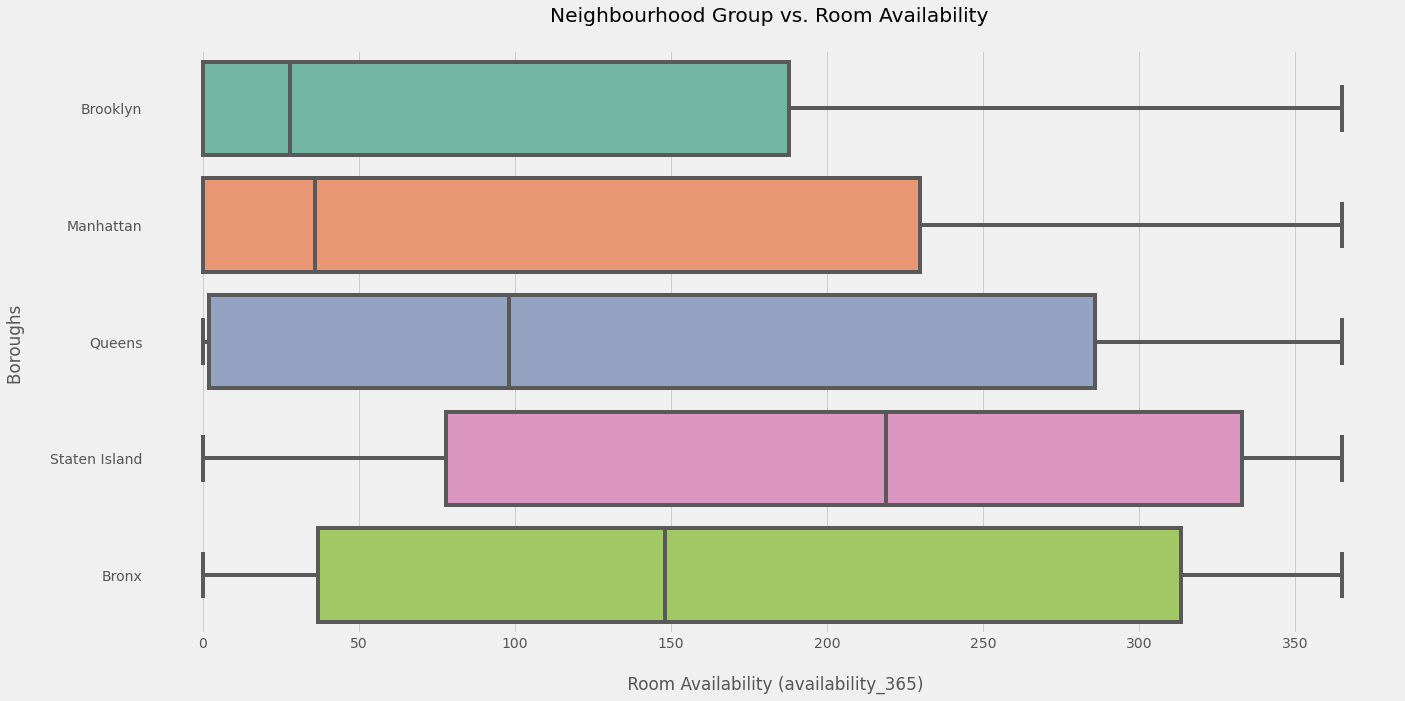

In [114]:
# Neighborhood Group vs Availability Room
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
plt.title("Neighbourhood Group vs. Room Availability \n")
boxgraph = sns.boxplot(data = df, orient="h", y='neighbourhood_group',x ='availability_365',palette="Set2")
boxgraph.set_ylabel("Boroughs \n")
boxgraph.set_xlabel("\n Room Availability (availability_365)")
plt.show()